In [1]:
# Import the libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Protein encodings- Loading data 

### KIBA Data

In [2]:
# Get the current working directory
path = os.getcwd()

# Set up the path to the data
path1 = os.path.join(path, 'kiba_figures_data')

# Load the data
# 2D protein encodings data
pcons_res = pd.read_csv(os.path.join(path1, 'pconsc_data.csv'))
esm_res = pd.read_csv(os.path.join(path1, 'esm_data.csv'))
alpha_res = pd.read_csv(os.path.join(path1, 'alpha_data.csv'))
random_res = pd.read_csv(os.path.join(path1, 'random_data.csv'))

# 1D protein encodings data
esm_kiba = pd.read_csv(os.path.join(path1, '1d_esm_kiba_data.csv'))
klifs_kiba = pd.read_csv(os.path.join(path1, '1d_klifs_kiba_data.csv'))

# Changing column names
esm_kiba.columns = esm_kiba.columns.str.replace('cmap', 'Encoding')
klifs_kiba.columns = klifs_kiba.columns.str.replace('cmap', 'Encoding')

# Setting encoding type
esm_kiba['Encoding'] = 'ESM'
klifs_kiba['Encoding'] = 'KLIFS'

# Combining the data
vertical_stack1 = pd.concat([pcons_res, esm_res, alpha_res, random_res], axis=0)
vertical_stack2= pd.concat([esm_kiba, klifs_kiba], axis=0)

# Melting the data for Seaborn plots
df_melted1 = pd.melt(vertical_stack1, id_vars=["cmap"], value_vars=["CI", "Pearson", 'RMSE', 'Spearman'])
df_melted2 = pd.melt(vertical_stack2, id_vars=["Encoding"], value_vars=["CI", "Pearson",'RMSE','Spearman'])


### Davis data

In [3]:
# Get the current working directory
path = os.getcwd()

# Set up the path to the Davis data
path2 = os.path.join(path, 'davis_figures_data')

# Load the Davis data
# 2D protein encodings data
pcons_res2 = pd.read_csv(os.path.join(path2, 'pconsc4_original_davis_data.csv'))
esm_res2 = pd.read_csv(os.path.join(path2, 'esm_original_davis_data.csv'))
alpha_res2 = pd.read_csv(os.path.join(path2, 'alphafold_original_davis_data.csv'))
random_res2 = pd.read_csv(os.path.join(path2, 'rand_original_davis_data.csv'))

# 1D protein encodings data
esm_davis = pd.read_csv(os.path.join(path2, '1d_esm_davis_data.csv'))
klifs_davis = pd.read_csv(os.path.join(path2, '1d_klifs_davis_data.csv'))

# Changing column names
esm_davis.columns = esm_davis.columns.str.replace('cmap', 'Encoding')
klifs_davis.columns = klifs_davis.columns.str.replace('cmap', 'Encoding')

# Setting encoding type
esm_davis['Encoding'] = 'ESM'
klifs_davis['Encoding'] = 'KLIFS'

# Combining the data
vertical_stack3 = pd.concat([pcons_res2, esm_res2, alpha_res2, random_res2], axis=0)
vertical_stack4 = pd.concat([esm_davis, klifs_davis], axis=0)

# Melting the data for Seaborn plots
df_melted3 = pd.melt(vertical_stack3, id_vars=["cmap"], value_vars=["CI", "Pearson", 'RMSE', 'Spearman'])
df_melted4 = pd.melt(vertical_stack4, id_vars=["Encoding"], value_vars=["CI", "Pearson",'RMSE','Spearman'])


## Plots- KIBA

### 2D Protein encodings

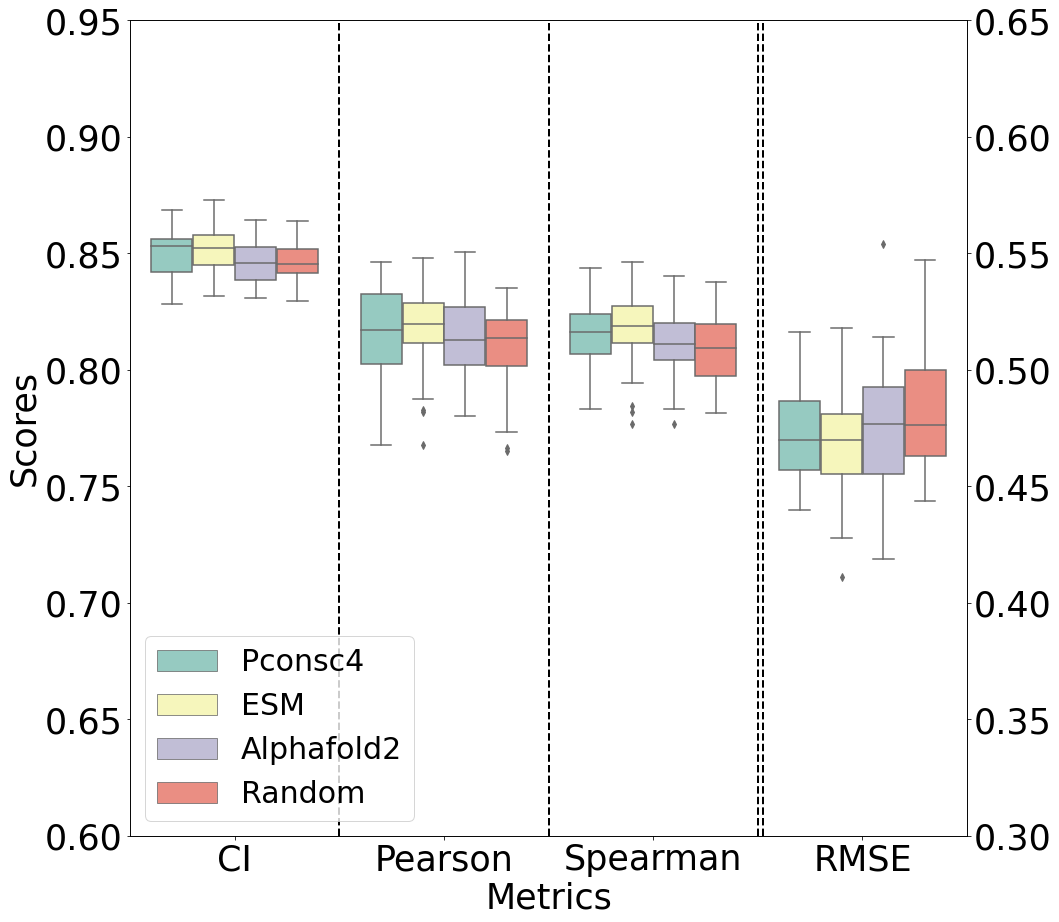

In [4]:
fig, ax = plt.subplots(figsize=(15, 15))

# Set hue order and boxplot order
hue_order=['Pconsc4','ESM','Alphafold2','Random']
order = ["CI", "Pearson",'Spearman','RMSE']
order1 = ["CI", "Pearson",'Spearman']
colors=['#93DBC2','#DB97DB','#9AB9D9']
# Create two different y-axes with different limits for different metrics
ax1 = ax.twinx()
ax1.set_ylim([0.3, 0.65])
ax.set_ylim([0.6, 0.95])

# Plot the boxplots
sns.boxplot(x='variable', y='value', hue='cmap', data=df_melted1[df_melted1['variable'] != "RMSE"], order=order1, palette="Set3", hue_order=hue_order, ax=ax)

sns.boxplot(x='variable', y='value', hue='cmap', data=df_melted1[df_melted1['variable'] == "RMSE"], order=order, palette="Set3", hue_order=hue_order, ax=ax1)
# Add vertical lines to separate different metrics
ax.axvline(x=0.5, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
ax.axvline(x=1.5, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
ax.axvline(x=2.5, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
ax.axvline(x=2.525, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
# Set labels and legend
ax.set_xlabel('Metrics', fontsize=35)
ax.set_ylabel('Scores', fontsize=35)
ax1.set_ylabel('', fontsize=35, labelpad=15)
ax.tick_params(axis='both', which='major', labelsize=35)
ax1.tick_params(axis='both', which='major', labelsize=35)
ax.legend(loc='lower left', fontsize=30)
ax1.legend_.remove()

# fig.savefig(os.path.join('results_new',  'kiba_prot2d' + '.png'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_new',  'kiba_prot2d' + '.pdf'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_new',  'kiba_prot2d' + '.svg'), dpi=500, bbox_inches='tight')

### 1D Protien encodings

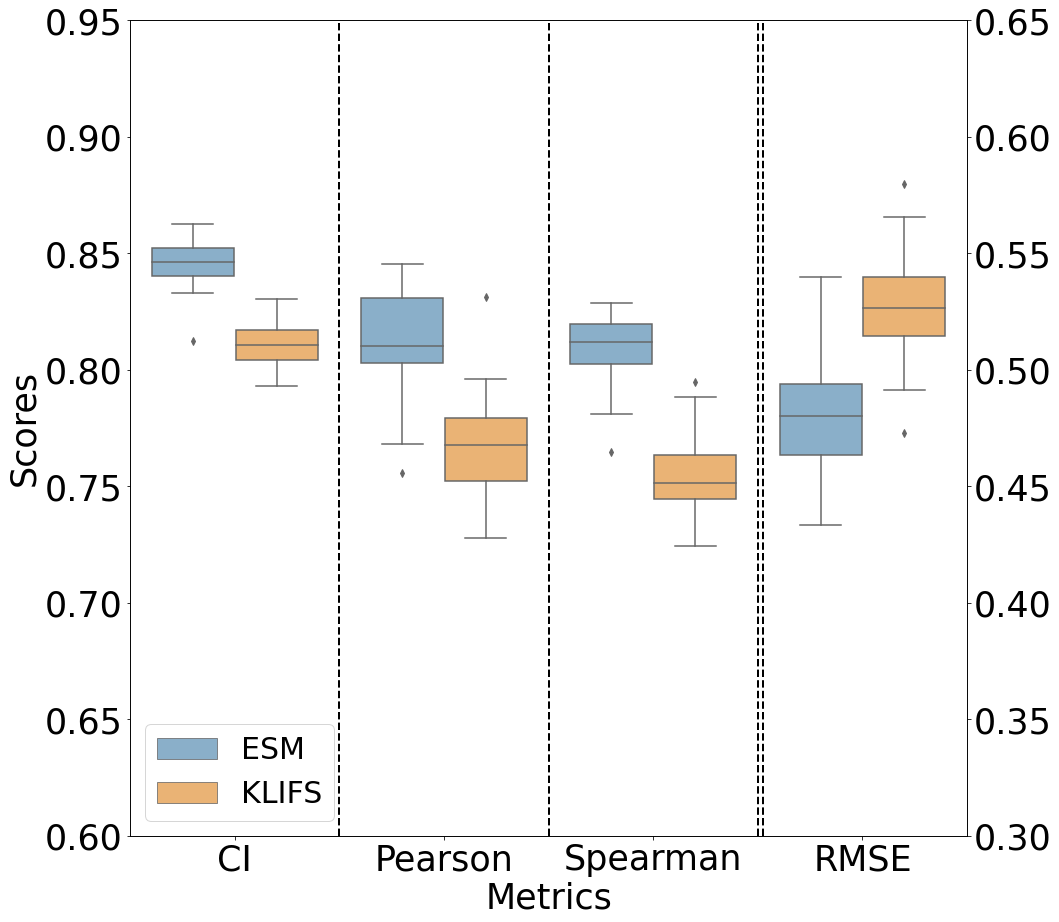

In [5]:

fig, ax = plt.subplots(figsize=(15, 15))

# Set hue order and boxplot order
hue_order=['ESM','KLIFS']
order = ["CI", "Pearson",'Spearman','RMSE']
order1 = ["CI", "Pearson",'Spearman']
#colors=['#93DBC2','#DB97DB','#9AB9D9']
colors = sns.color_palette("Set3", n_colors=8)
custom_palette = [colors[4], colors[5]]

# Create two different y-axes with different limits for different metrics
ax1 = ax.twinx()
ax1.set_ylim([0.3, 0.65])
ax.set_ylim([0.6, 0.95])

# Plot the boxplots
sns.boxplot(x='variable', y='value', hue='Encoding', data=df_melted2[df_melted2['variable'] != "RMSE"], order=order1, palette=custom_palette, hue_order=hue_order, ax=ax)

sns.boxplot(x='variable', y='value', hue='Encoding', data=df_melted2[df_melted2['variable'] == "RMSE"], order=order, palette=custom_palette, hue_order=hue_order, ax=ax1)
# Add vertical lines to separate different metrics
ax.axvline(x=0.5, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
ax.axvline(x=1.5, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
ax.axvline(x=2.5, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
ax.axvline(x=2.525, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
# Set labels and legend
ax.set_xlabel('Metrics', fontsize=35)
ax.set_ylabel('Scores', fontsize=35)
ax1.set_ylabel('', fontsize=35, labelpad=25)
ax.tick_params(axis='both', which='major', labelsize=35)
ax1.tick_params(axis='both', which='major', labelsize=35)
ax.legend(loc='lower left', fontsize=30)
ax1.legend_.remove()

# fig.savefig(os.path.join('results_new',  'kiba_prot1d' + '.png'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_new',  'kiba_prot1d' + '.pdf'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_new',  'kiba_prot1d' + '.svg'), dpi=500, bbox_inches='tight')

## Plots- Davis

### 2D Protein encodings

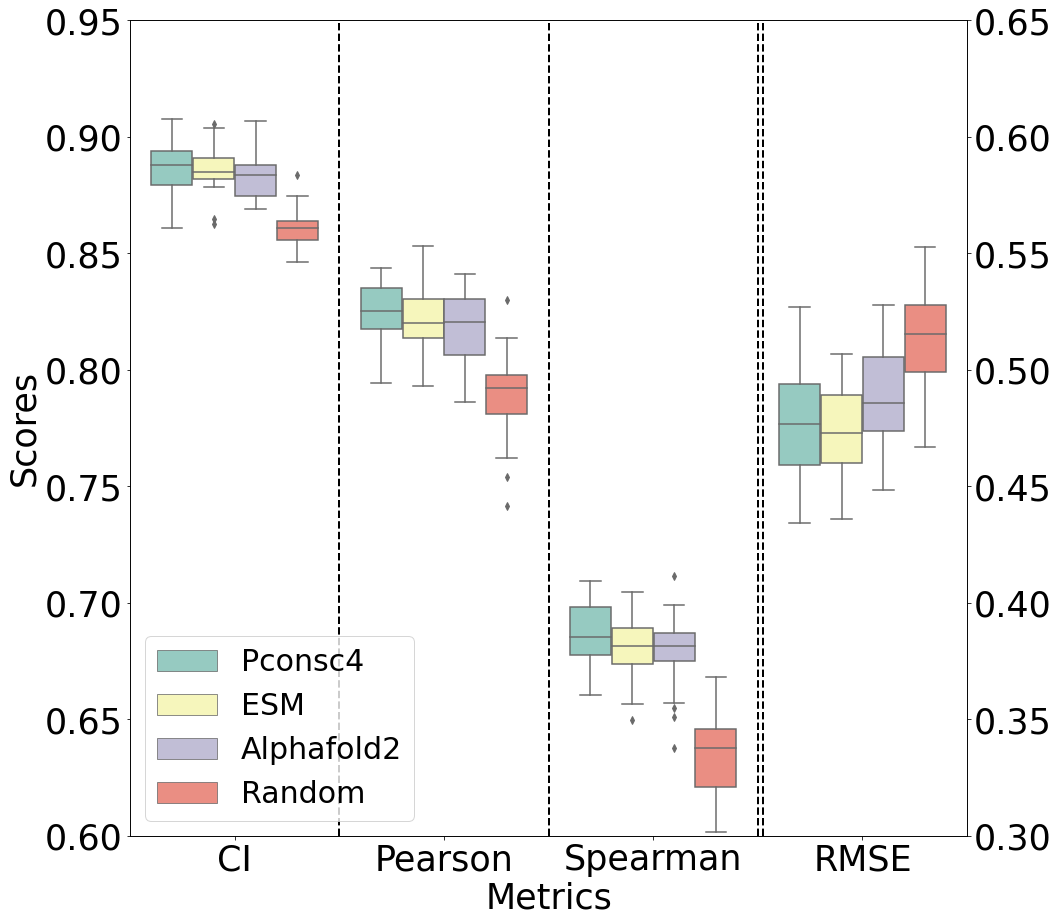

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))

# Set hue order and boxplot order
hue_order=['Pconsc4','ESM','Alphafold2','Random']
order = ["CI", "Pearson",'Spearman','RMSE']
order1 = ["CI", "Pearson",'Spearman']
colors=['#93DBC2','#DB97DB','#9AB9D9']
# Create two different y-axes with different limits for different metrics
ax1 = ax.twinx()
ax1.set_ylim([0.3, 0.65])
ax.set_ylim([0.6, 0.95])

# Plot the boxplots
sns.boxplot(x='variable', y='value', hue='cmap', data=df_melted3[df_melted3['variable'] != "RMSE"], order=order1, palette="Set3", hue_order=hue_order, ax=ax)
# sns.boxplot(x='variable', y='value', hue='Encoding', data=df_melted5[df_melted5['variable'] == "RMSE"], 
#             order=order[3:], palette=colors, hue_order=hue_order, ax=ax1)
sns.boxplot(x='variable', y='value', hue='cmap', data=df_melted3[df_melted3['variable'] == "RMSE"], order=order, palette="Set3", hue_order=hue_order, ax=ax1)
# Add vertical lines to separate different metrics
ax.axvline(x=0.5, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
ax.axvline(x=1.5, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
ax.axvline(x=2.5, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
ax.axvline(x=2.525, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
# Set labels and legend
ax.set_xlabel('Metrics', fontsize=35)
ax.set_ylabel('Scores', fontsize=35)
ax1.set_ylabel('', fontsize=35, labelpad=15)
ax.tick_params(axis='both', which='major', labelsize=35)
ax1.tick_params(axis='both', which='major', labelsize=35)
ax.legend(loc='lower left', fontsize=30)
ax1.legend_.remove()

# fig.savefig(os.path.join('results_new',  'davis_prot2d' + '.png'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_new',  'davis_prot2d' + '.pdf'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_new',  'davis_prot2d' + '.svg'), dpi=500, bbox_inches='tight')

### 1D Protein encodings

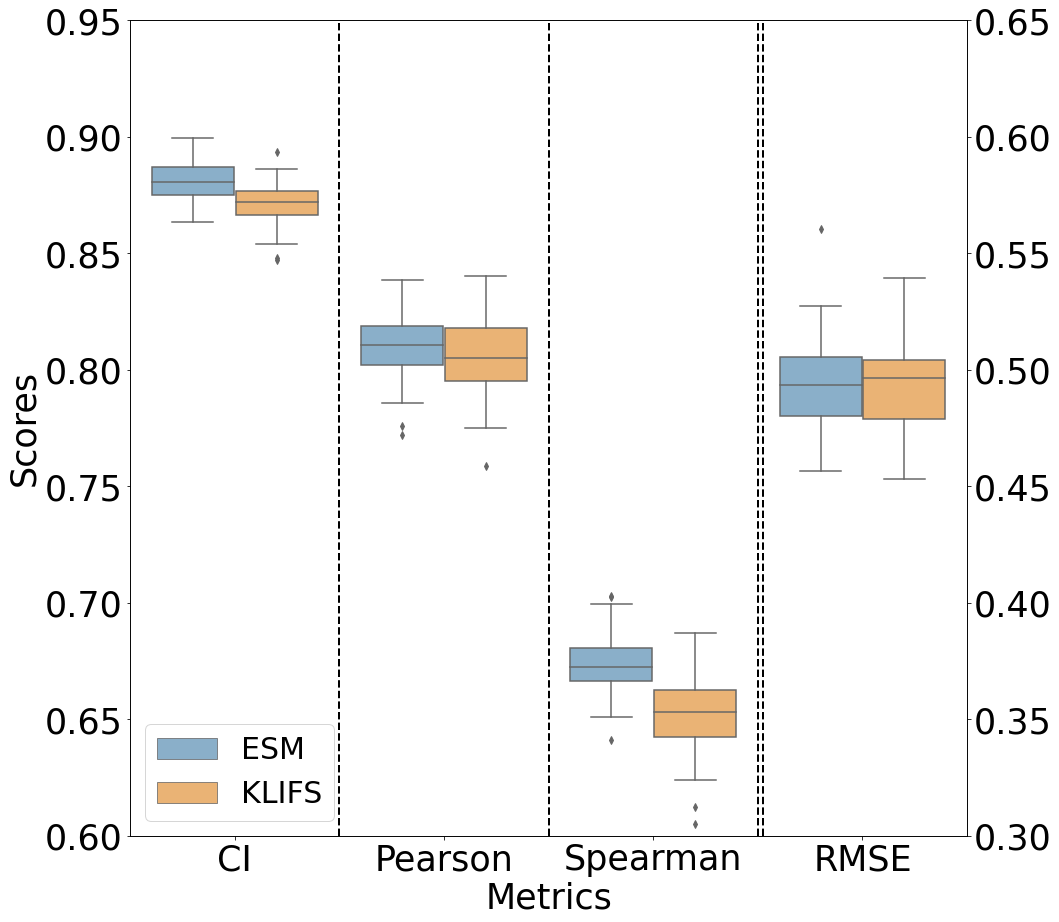

In [7]:
fig, ax = plt.subplots(figsize=(15, 15))

# Set hue order and boxplot order
hue_order=['ESM','KLIFS']
order = ["CI", "Pearson",'Spearman','RMSE']
order1 = ["CI", "Pearson",'Spearman']
#colors=['#93DBC2','#DB97DB','#9AB9D9']
colors = sns.color_palette("Set3", n_colors=8)
custom_palette = [colors[4], colors[5]]

# Create two different y-axes with different limits for different metrics
ax1 = ax.twinx()
ax1.set_ylim([0.3, 0.65])
ax.set_ylim([0.6, 0.95])

# Plot the boxplots
sns.boxplot(x='variable', y='value', hue='Encoding', data=df_melted4[df_melted4['variable'] != "RMSE"], order=order1, palette=custom_palette, hue_order=hue_order, ax=ax)
# sns.boxplot(x='variable', y='value', hue='Encoding', data=df_melted5[df_melted5['variable'] == "RMSE"], 
#             order=order[3:], palette=colors, hue_order=hue_order, ax=ax1)
sns.boxplot(x='variable', y='value', hue='Encoding', data=df_melted4[df_melted4['variable'] == "RMSE"], order=order, palette=custom_palette, hue_order=hue_order, ax=ax1)
# Add vertical lines to separate different metrics
ax.axvline(x=0.5, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
ax.axvline(x=1.5, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
ax.axvline(x=2.5, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
ax.axvline(x=2.525, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
# Set labels and legend
ax.set_xlabel('Metrics', fontsize=35)
ax.set_ylabel('Scores', fontsize=35)
ax1.set_ylabel('', fontsize=35, labelpad=15)
ax.tick_params(axis='both', which='major', labelsize=35)
ax1.tick_params(axis='both', which='major', labelsize=35)
ax.legend(loc='lower left', fontsize=30)
ax1.legend_.remove()

# fig.savefig(os.path.join('results_new',  'davis_prot1d' + '.png'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_new',  'davis_prot1d' + '.pdf'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_new',  'davis_prot1d' + '.svg'), dpi=500, bbox_inches='tight')

## Ligand Encodings

In [8]:
colors = sns.color_palette("Pastel1", n_colors=12)
colors1 = sns.color_palette("Set3", n_colors=10)
custom_palette = [colors1[0], colors[6],colors1[9],colors1[8]]
hue_order2=['Original','Point Random', 'Random Node','Random']
order = ["CI", "Pearson",'Spearman','RMSE',]
metric_order = ["CI", "Pearson",'Spearman','RMSE']

In [9]:
# Set up the path to the data
path3 = os.path.join(path, 'kiba_figures_data')
path4 = os.path.join(path, 'davis_figures_data')

# Load the KIBA ligand encoding data
rand_mol_res1 = pd.read_csv(os.path.join(path3, 'random_mol_data.csv'))
pcons_res_mol1 = pd.read_csv(os.path.join(path3, 'original_mol_data.csv'))
point_rand_mol1 = pd.read_csv(os.path.join(path3, 'congeneric_kiba_data.csv'))
point_rand_nod_mol1 = pd.read_csv(os.path.join(path3, 'Random_node_data_kiba.csv'))

# Load the Davis ligand encoding data
rand_mol_res2 = pd.read_csv(os.path.join(path4, 'pconcs4_random_davis_data.csv'))
pcons_res_mol2 = pd.read_csv(os.path.join(path4, 'pconcs4_original_ligand_davis_data.csv'))
point_rand_mol2 = pd.read_csv(os.path.join(path4, 'pconcs4_congeneric_ligand_davis_data.csv'))
point_rand_nod_mol2 = pd.read_csv(os.path.join(path4, 'ligand_davis_random_node_data.csv'))

# Changing column names and encoding types for KIBA data
for df in [rand_mol_res1, pcons_res_mol1, point_rand_mol1, point_rand_nod_mol1]:
    df.columns = df.columns.str.replace('cmap', 'Encoding')

rand_mol_res1['Encoding'].replace('Random Ligand Graph', 'Random', inplace=True)
pcons_res_mol1['Encoding'].replace('Original Ligand Graph', 'Original', inplace=True)
point_rand_mol1['Encoding'].replace('Point Randomized', 'Point Random', inplace=True)
point_rand_nod_mol1['Encoding'].replace('Random Node Ligand Graph', 'Random Node', inplace=True)

# Changing column names and encoding types for Davis data
for df in [rand_mol_res2, pcons_res_mol2, point_rand_mol2, point_rand_nod_mol2]:
    df.columns = df.columns.str.replace('cmap', 'Encoding')

rand_mol_res2['Encoding'].replace('Random Ligand Graph', 'Random', inplace=True)
pcons_res_mol2['Encoding'].replace('Original Ligand Graph', 'Original', inplace=True)
point_rand_mol2['Encoding'].replace('Point Randomization Ligand Graph', 'Point Random', inplace=True)
point_rand_nod_mol2['Encoding'].replace('Random Node Ligand Graph', 'Random Node', inplace=True)

# Combining the data
vertical_stack5 = pd.concat([pcons_res_mol1, rand_mol_res1, point_rand_mol1, point_rand_nod_mol1], axis=0)
vertical_stack6 = pd.concat([pcons_res_mol2, rand_mol_res2, point_rand_mol2, point_rand_nod_mol2], axis=0)

# Melting the data for Seaborn plots
df_melted5 = pd.melt(vertical_stack5, id_vars=["Encoding"], value_vars=["CI", "Pearson",'RMSE','Spearman'])
df_melted6 = pd.melt(vertical_stack6, id_vars=["Encoding"], value_vars=["CI", "Pearson",'RMSE','Spearman'])


### KIBA

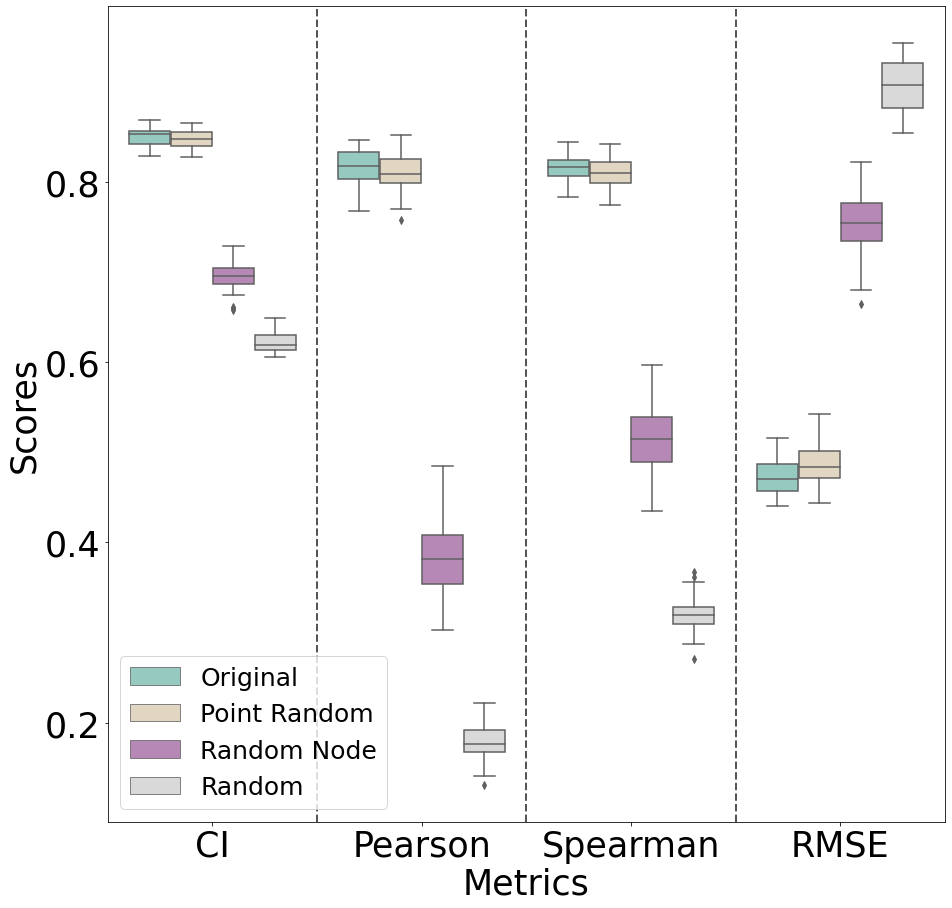

In [10]:
fig = plt.figure(figsize=(15, 15))
ax =  sns.boxplot(x='variable', y='value',hue='Encoding', data=df_melted5, order=order,palette=custom_palette,  hue_order=hue_order2)
for i in range(len(metric_order) - 1):
    ax.axvline(x=i + 0.5, ymin=0, ymax=1, color='#555555', linestyle='--', linewidth=2)
ax.set_xlabel('Metrics',fontsize=35)
ax.set_ylabel('Scores',fontsize=35)
ax.tick_params(axis='both', which='major', labelsize=35)
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
plt.legend(loc='lower left',fontsize=25)

# fig.savefig(os.path.join('results_new',  'kiba_ligands2d1' + '.png'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_new',  'kiba_ligands2d1' + '.pdf'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_new',  'kiba_ligands2d1' + '.svg'), dpi=500, bbox_inches='tight')


### Davis

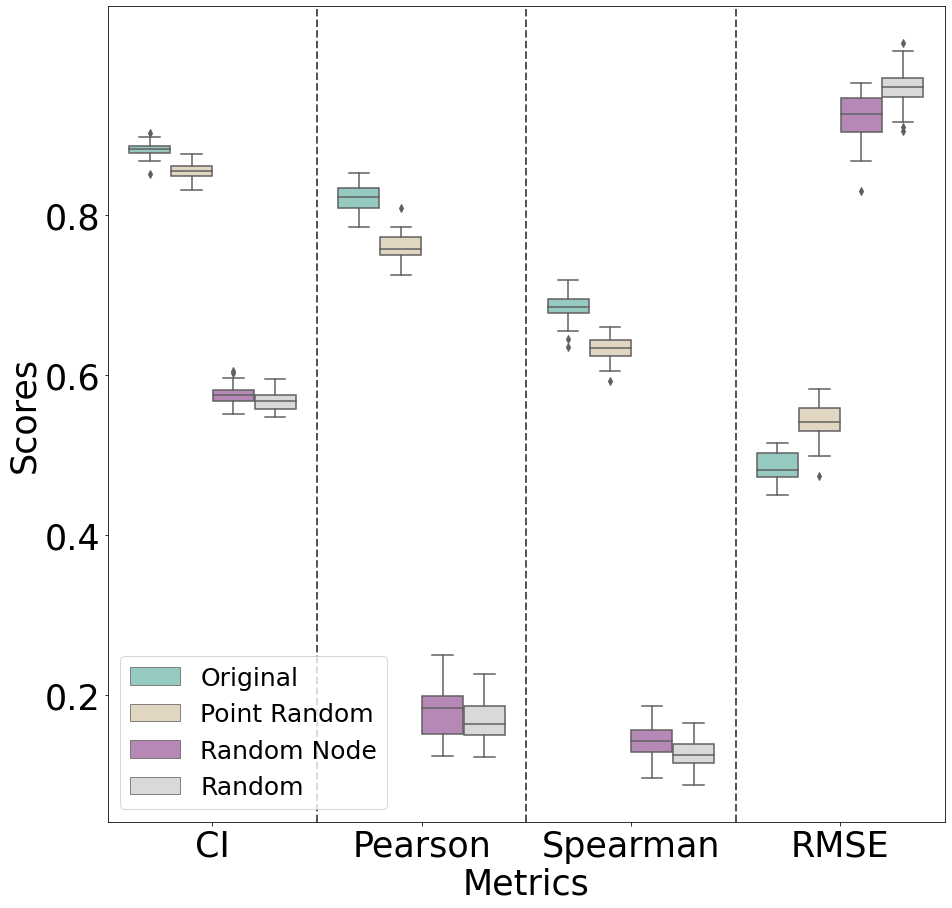

In [11]:
fig = plt.figure(figsize=(15, 15))

# adjust_box_widths(fig, 1.2)
hue_order2=['Original','Point Random', 'Random Node','Random']
order = ["CI", "Pearson",'Spearman','RMSE',]
metric_order = ["CI", "Pearson",'Spearman','RMSE']

ax =  sns.boxplot(x='variable', y='value',hue='Encoding', data=df_melted6, order=order,palette=custom_palette,  hue_order=hue_order2)
for i in range(len(metric_order) - 1):
    ax.axvline(x=i + 0.5, ymin=0, ymax=1, color='#555555', linestyle='--', linewidth=2)
ax.set_xlabel('Metrics',fontsize=35)
ax.set_ylabel('Scores',fontsize=35)
ax.tick_params(axis='both', which='major', labelsize=35)
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
plt.legend(loc='lower left',fontsize=25)

# fig.savefig(os.path.join('results_new',  'davis_ligands2d1' + '.png'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_new',  'davis_ligands2d1' + '.pdf'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_new',  'davis_ligands2d1' + '.svg'), dpi=500, bbox_inches='tight')


## Combined Encodings

In [12]:
# Set hue order and boxplot order
hue_order=['Concat','Product','Concat+Product']
order = ["CI", "Pearson",'Spearman','RMSE']
order1 = ["CI", "Pearson",'Spearman']
colors=['#93DBC2','#DB97DB','#9AB9D9']

In [13]:
# Load the combined encodings data for KIBA
concat_res1 = pd.read_csv(os.path.join(path3, 'pconsc_data.csv'))
prod_res1 = pd.read_csv(os.path.join(path3, 'kiba_product_data.csv'))
prod_con_res1 = pd.read_csv(os.path.join(path3, 'kiba_prod_concat_data.csv'))

# Load the combined encodings data for Davis
concat_res2 = pd.read_csv(os.path.join(path4, 'pconcs4_original_concat_davis_data.csv'))
prod_res2 = pd.read_csv(os.path.join(path4, 'pconcs4_original_product_davis_data.csv'))
prod_con_res2 = pd.read_csv(os.path.join(path4, 'pconcs4_original_ligand_prod+conc_davis_data.csv'))

# Changing column names and encoding types for KIBA data
for df in [concat_res1, prod_res1, prod_con_res1]:
    df.columns = df.columns.str.replace('cmap', 'Encoding')

concat_res1['Encoding'].replace('Pconsc4', 'Concat', inplace=True)
prod_res1['Encoding'].replace('Point Randomization Ligand Graph', 'Product', inplace=True)
prod_con_res1['Encoding'].replace('Point Randomization Ligand Graph', 'Concat+Product', inplace=True)

# Changing column names and encoding types for Davis data
for df in [concat_res2, prod_res2, prod_con_res2]:
    df.columns = df.columns.str.replace('cmap', 'Encoding')

concat_res2['Encoding'].replace('Pconsc4', 'Concat', inplace=True)
prod_res2['Encoding'].replace('Point Randomization Ligand Graph', 'Product', inplace=True)
prod_con_res2['Encoding'].replace('Point Randomization Ligand Graph', 'Concat+Product', inplace=True)

# Combining the data
vertical_stack7 = pd.concat([concat_res1, prod_res1, prod_con_res1], axis=0)
vertical_stack8 = pd.concat([concat_res2, prod_res2, prod_con_res2], axis=0)

# Melting the data for Seaborn plots
df_melted7 = pd.melt(vertical_stack7, id_vars=["Encoding"], value_vars=["CI", "Pearson",'RMSE','Spearman'])
df_melted8 = pd.melt(vertical_stack8, id_vars=["Encoding"], value_vars=["CI", "Pearson",'RMSE','Spearman'])


### KIBA

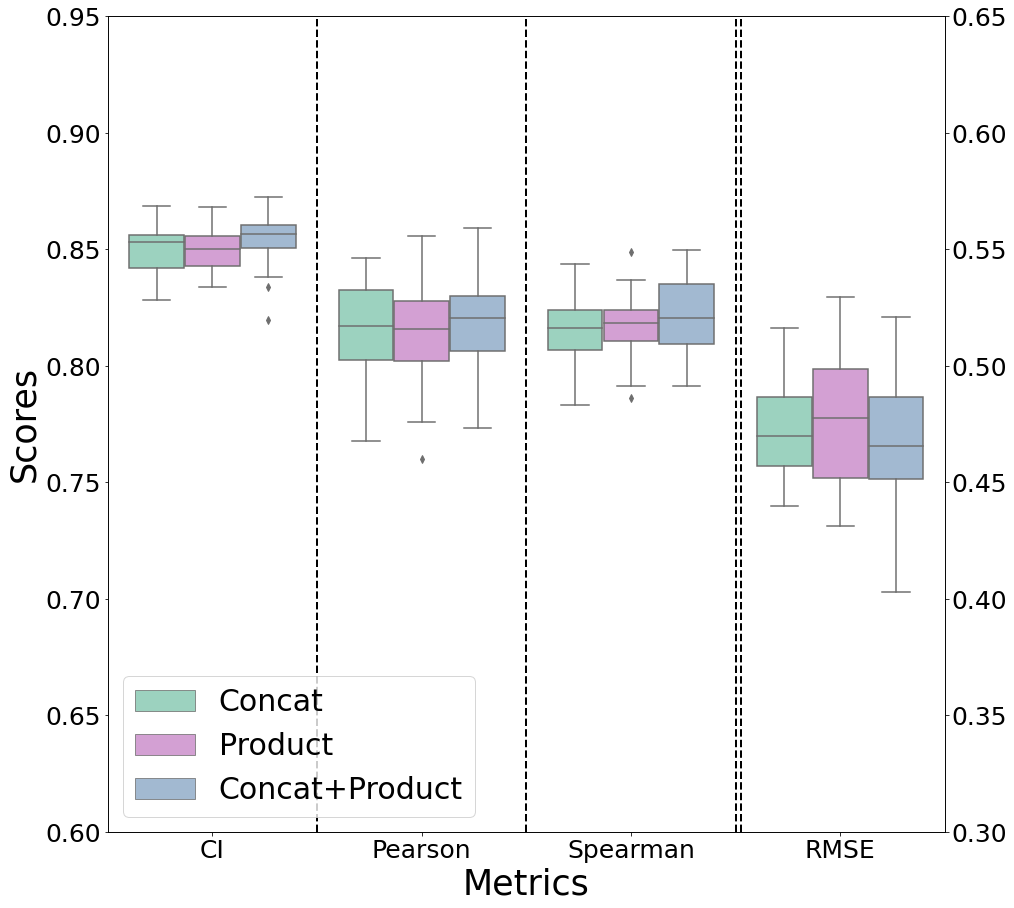

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))

# Set hue order and boxplot order
hue_order=['Concat','Product','Concat+Product']
order = ["CI", "Pearson",'Spearman','RMSE']
order1 = ["CI", "Pearson",'Spearman']
colors=['#93DBC2','#DB97DB','#9AB9D9']
# Create two different y-axes with different limits for different metrics
ax1 = ax.twinx()
ax1.set_ylim([0.3, 0.65])
ax.set_ylim([0.6, 0.95])

# Plot the boxplots
sns.boxplot(x='variable', y='value', hue='Encoding', data=df_melted7[df_melted7['variable'] != "RMSE"], order=order1, palette=colors, hue_order=hue_order, ax=ax)

sns.boxplot(x='variable', y='value', hue='Encoding', data=df_melted7[df_melted7['variable'] == "RMSE"], order=order, palette=colors, hue_order=hue_order, ax=ax1)
# Add vertical lines to separate different metrics
ax.axvline(x=0.5, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
ax.axvline(x=1.5, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
ax.axvline(x=2.5, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
ax.axvline(x=2.525, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
# Set labels and legend
ax.set_xlabel('Metrics', fontsize=35)
ax.set_ylabel('Scores', fontsize=35)
ax1.set_ylabel('', fontsize=35, labelpad=15)
ax.tick_params(axis='both', which='major', labelsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax.legend(loc='lower left', fontsize=30)
ax1.legend_.remove()

# fig.savefig(os.path.join('results_new',  'kiba_comb1' + '.png'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_new',  'kiba_comb1' + '.pdf'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_new',  'kiba_comb1' + '.svg'), dpi=500, bbox_inches='tight')



### Davis

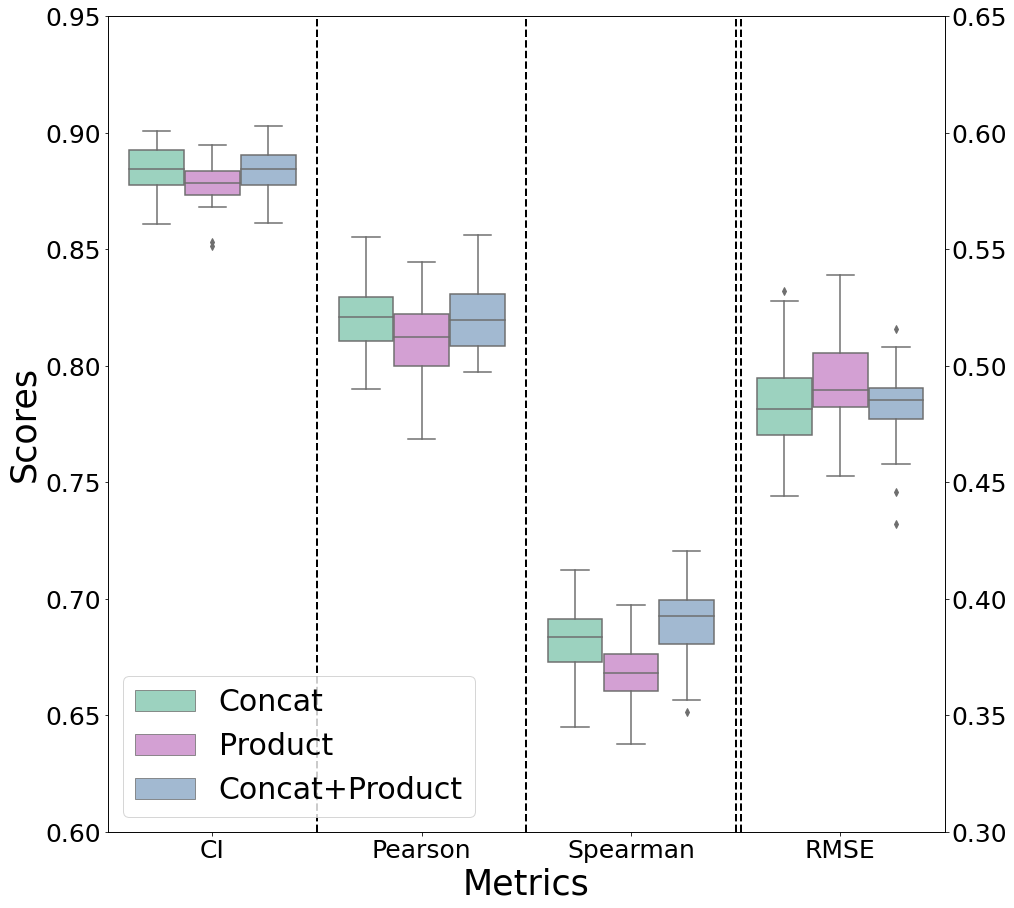

In [15]:
fig, ax = plt.subplots(figsize=(15, 15))


# Create two different y-axes with different limits for different metrics
ax1 = ax.twinx()
ax1.set_ylim([0.3, 0.65])
ax.set_ylim([0.6, 0.95])

# Plot the boxplots
sns.boxplot(x='variable', y='value', hue='Encoding', data=df_melted8[df_melted8['variable'] != "RMSE"], order=order1, palette=colors, hue_order=hue_order, ax=ax)

sns.boxplot(x='variable', y='value', hue='Encoding', data=df_melted8[df_melted8['variable'] == "RMSE"], order=order, palette=colors, hue_order=hue_order, ax=ax1)
# Add vertical lines to separate different metrics
ax.axvline(x=0.5, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
ax.axvline(x=1.5, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
ax.axvline(x=2.5, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
ax.axvline(x=2.525, ymin=0, ymax=1, color='black', linestyle='--', linewidth=2)
# Set labels and legend
ax.set_xlabel('Metrics', fontsize=35)
ax.set_ylabel('Scores', fontsize=35)
ax1.set_ylabel('', fontsize=35, labelpad=15)
ax.tick_params(axis='both', which='major', labelsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax.legend(loc='lower left', fontsize=30)
ax1.legend_.remove()

# fig.savefig(os.path.join('results_new',  'davis_comb1' + '.png'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_new',  'davis_comb1' + '.pdf'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results_new',  'davis_comb1' + '.svg'), dpi=500, bbox_inches='tight')